In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
train_bodies_data = pd.read_csv('fnc-1/train_bodies.csv')
train_stances_data = pd.read_csv('fnc-1/train_stances.csv')

In [72]:
train_bodies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Body ID      1683 non-null   int64 
 1   articleBody  1683 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [14]:
train_bodies_data.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [73]:
train_stances_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  49972 non-null  object
 1   Body ID   49972 non-null  int64 
 2   Stance    49972 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [74]:
train_stances_data.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


In [45]:
train_article_body_words_count = train_bodies_data.articleBody.map(
    lambda body: len(body.split()))

In [30]:
type(train_bodies_data.articleBody.map(lambda body: len(body.split())))

pandas.core.series.Series

Text(0, 0.5, 'Number of articles')

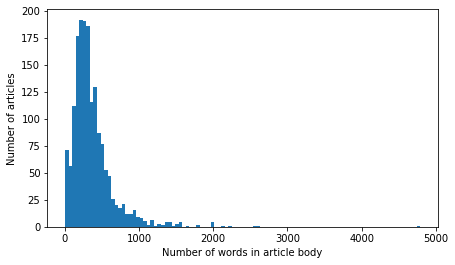

In [81]:
figure, axes = plt.subplots(1, 1, figsize=(7, 4))
hist = axes.hist(train_article_body_words_count, bins=100)
axes.set_xlabel('Number of words in article body')
axes.set_ylabel('Number of articles')

Text(0, 0.5, 'Number of words in article body')

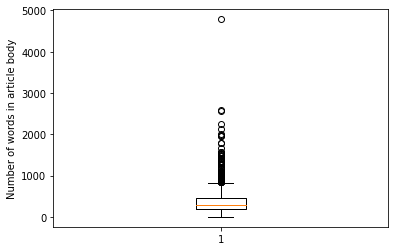

In [83]:
figure, axes = plt.subplots(1, 1, figsize=(6, 4))
boxplot = axes.boxplot(train_article_body_words_count)
axes.set_ylabel('Number of words in article body')

In [104]:
number_of_stances_per_body = train_stances_data.groupby('Body ID').size()
number_of_stances_per_body.head(10)

Body ID
0      36
4       1
5      56
6       1
7     102
8      45
9       2
10     46
11     71
13     15
dtype: int64

Text(0, 0.5, 'Number of stances per article body')

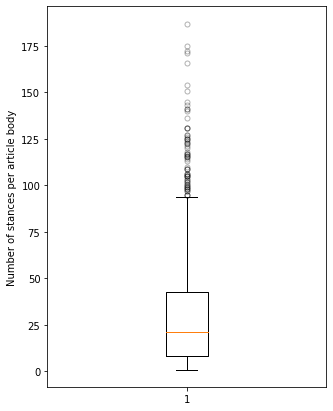

In [149]:
figure, axes = plt.subplots(1, 1, figsize=(5, 7))
boxplot = axes.boxplot(number_of_stances_per_body, flierprops=dict(markersize=5, alpha=0.3))
axes.set_ylabel('Number of stances per article body')

In [204]:
frequency_of_stances = train_stances_data.groupby('Stance').size()

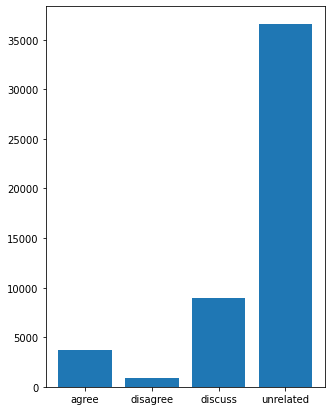

In [205]:
figure, axes = plt.subplots(1, 1, figsize=(5, 7))
bar_plot = axes.bar(frequency_of_stances.axes[0], frequency_of_stances)